<a href="https://colab.research.google.com/github/ViktoriyaMarochkina/Project_data_analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Подключим необходимые для работы библиотеки

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузим файл с данными с гугл диска

In [43]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/young-people-survey.csv', sep = ";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Выделим из основной таблицы только интересующие нас данные (данные о музыке и фильмах) в две новые таблицы.
Здесь мы используем функцию read_csv() из библиотеки Pandas для загрузки данных из CSV-файла в объект DataFrame. Затем мы выбираем только нужные столбцы, указав их имена в списке selected_columns.


In [47]:
selected_columns = ['Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
                    'Metal or Hardrock', 'Punk', 'Hiphop, Rap',
                    'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']
music = data[selected_columns]

selected_columns = ['Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western']
movies = data[selected_columns]

print(music.shape)
print(music.head())
print("\n")
print(movies.shape)
print(movies.head())

(1010, 18)
   Slow songs or fast songs  Dance  Folk  Country  Classical music  Musical  \
0                       3.0    2.0   1.0      2.0              2.0      1.0   
1                       4.0    2.0   1.0      1.0              1.0      2.0   
2                       5.0    2.0   2.0      3.0              4.0      5.0   
3                       3.0    2.0   1.0      1.0              1.0      1.0   
4                       3.0    4.0   3.0      2.0              4.0      3.0   

   Pop  Rock  Metal or Hardrock  Punk  Hiphop, Rap  Reggae, Ska  Swing, Jazz  \
0  5.0   5.0                1.0   1.0          1.0          1.0          1.0   
1  3.0   5.0                4.0   4.0          1.0          3.0          1.0   
2  3.0   5.0                3.0   4.0          1.0          4.0          3.0   
3  2.0   2.0                1.0   4.0          2.0          2.0          1.0   
4  5.0   3.0                1.0   2.0          5.0          3.0          2.0   

   Rock n roll  Alternative  Lati

Проверим таблицы на наличие пропусков.
Для поиска пропусков (NULL, NaN, None и т.д.) в столбцах таблицы будем использовать функцию isnull() из библиотеки Pandas. Эта функция возвращает таблицу той же формы, что и исходная, но заполненную значениями True и False, указывающими, является ли значение в соответствующей ячейке пропуском.
Нам достаточно определить есть ли хотя бы один пропуск, поэтому будем использовать функцию any(), выведется таблица с булевыми значениями, указывающими, содержит ли каждый столбец хотя бы один пропуск.

In [26]:
has_null = music.isnull().any()
print(has_null)
print("\n")
has_null = movies.isnull().any()
print(has_null)

Slow songs or fast songs    True
Dance                       True
Folk                        True
Country                     True
Classical music             True
Musical                     True
Pop                         True
Rock                        True
Metal or Hardrock           True
Punk                        True
Hiphop, Rap                 True
Reggae, Ska                 True
Swing, Jazz                 True
Rock n roll                 True
Alternative                 True
Latino                      True
Techno, Trance              True
Opera                       True
dtype: bool


Horror                 True
Thriller               True
Comedy                 True
Romantic               True
Sci-fi                 True
War                    True
Fantasy/Fairy tales    True
Animated               True
Documentary            True
Western                True
dtype: bool


Теперь заполним пустые ячейки





Выполним заполнение пропущенных значений в столбцах таблицы movies с использованием метода наименьшего евклидова расстояния.
Начнём с таблицы movies.

1. Импортируется функция euclidean из модуля scipy.spatial.distance. Она будет использоваться для вычисления евклидова расстояния между векторами при заполнении пропущенных значений.

2. Определяется функция fill_missing_values, которая принимает два аргумента: column - столбец, в котором нужно заполнить пропущенные значения, и related_columns - список связанных столбцов, которые будут использоваться для вычисления расстояний.

3. Внутри функции происходит итерация по значениям столбца column. Если значение является пропущенным (np.isnan(value) возвращает True), то выполняется следующие действия:
   - Получается текущая строка таблицы movies с помощью метода .iloc[i].loc[related_columns].
   - Создается пустой список distances, который будет хранить расстояния между текущей строкой и остальными строками таблицы movies.
   - Происходит вторая итерация по строкам таблицы movies с помощью метода .iterrows(). Если значение в столбце column.name не является пропущенным (not np.isnan(row[column.name]) возвращает True), то вычисляется евклидово расстояние между текущей строкой и рассматриваемой строкой, и это расстояние добавляется в список distances. Если значение в столбце column.name является пропущенным, то значение np.inf добавляется в список distances.
   - Индекс строки с наименьшим расстоянием сохраняется в переменную closest_index с помощью функции np.argmin(distances).
   - Пропущенное значение в столбце column на текущей позиции заменяется на значение из наиболее близкой строки в столбце column.name с помощью кода column.iloc[i] = movies.iloc[closest_index][column.name].

4. Определяется список movies_columns, который содержит названия столбцов, в которых нужно заполнить пропущенные значения.

5. Выполняется цикл for по каждому имени столбца column_name из списка movies_columns.

6. Внутри цикла вызывается функция fill_missing_values с аргументами movies[column_name] и movies_columns, чтобы заполнить пропущенные значения в соответствующем столбце таблицы movies.

Данный код позволяет заполнить пропущенные значения в столбцах таблицы movies на основе наименьшего евклидова расстояния от текущей строки до остальных строк таблицы. Таким образом, он выполняет операцию заполнения пропусков с использованием метода ближайшего соседа.

In [51]:
from scipy.spatial.distance import euclidean

# Функция для заполнения пропущенных значений в столбце
def fill_missing_values(column, related_columns):
    for i, value in enumerate(column):
        if np.isnan(value):
            current_row = movies.iloc[i].loc[related_columns]
            distances = []
            for j, row in movies.iterrows():
                if not np.isnan(row[column.name]):
                    distances.append(euclidean(np.nan_to_num(current_row), np.nan_to_num(row[related_columns])))
                else:
                    distances.append(np.inf)
            closest_index = np.argmin(distances)
            column.iloc[i] = movies.iloc[closest_index][column.name]

# Список столбцов, в которых нужно заполнить пропущенные значения
movies_columns = ['Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Horror', 'Thriller', 'Comedy', 'Sci-fi', 'War', 'Western']

# Заполнение пропущенных значений в столбцах таблицы movies
for column_name in movies_columns:
    fill_missing_values(movies[column_name], movies_columns)


Проверим наличие пропусков в таблице после заполнения.

In [28]:
has_null = movies.isnull().any()
print(has_null)

Horror                 False
Thriller               False
Comedy                 False
Romantic               False
Sci-fi                 False
War                    False
Fantasy/Fairy tales    False
Animated               False
Documentary            False
Western                False
dtype: bool


Аналогично заполним таблцу music.

In [49]:
# Функция для заполнения пропущенных значений в столбце
def fill_missing_values(column, related_columns):
    for i, value in enumerate(column):
        if np.isnan(value):
            current_row = music.iloc[i].loc[related_columns]
            distances = []
            for j, row in music.iterrows():
                if not np.isnan(row[column.name]):
                    distances.append(euclidean(np.nan_to_num(current_row), np.nan_to_num(row[related_columns])))
                else:
                    distances.append(np.inf)
            closest_index = np.argmin(distances)
            column.iloc[i] = music.iloc[closest_index][column.name]

# Список столбцов, в которых нужно заполнить пропущенные значения
music_columns = [ 'Slow songs or fast songs','Classical music', 'Opera', 'Swing, Jazz', 'Reggae, Ska', 'Country',
                 'Musical', 'Dance', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk',
                 'Folk', 'Hiphop, Rap', 'Rock n roll', 'Alternative', 'Latino',
                 'Techno, Trance']

# Заполнение пропущенных значений в столбцах таблицы music
for column_name in music_columns:
    fill_missing_values(music[column_name], music_columns)

Проверим, что все пропуски заполнены.

In [30]:
has_null = music.isnull().any()
print(has_null)

Slow songs or fast songs    False
Dance                       False
Folk                        False
Country                     False
Classical music             False
Musical                     False
Pop                         False
Rock                        False
Metal or Hardrock           False
Punk                        False
Hiphop, Rap                 False
Reggae, Ska                 False
Swing, Jazz                 False
Rock n roll                 False
Alternative                 False
Latino                      False
Techno, Trance              False
Opera                       False
dtype: bool


Все пропуски заполнены.

Гипотеза о связи между стилем музыки и предпочтениями в фильмах: можно предположить, что люди, предпочитающие более энергичную музыку, склонны к выбору более динамичных жанров фильмов, в то время как люди, предпочитающие более спокойную музыку, склонны к выбору более спокойных жанров фильмов.

Для нашего исследования требовалось разделить жанры музыки и фильмов на два класса. Спокойные и Энергичные/Динамичные. Сделаем это вручную, основываясь на эмпирическом опыте.

МУЗЫКА

Спокойные жанры:
- Classical music, Opera
- Jazz, Swing
- Reggae, Ska
- Country, Musical

Энергичные жанры:
- Dance, Pop, Rock, Metal or Hardrock, Punk, Folk
- Hiphop, Rap
- Rock n roll, Alternative, Latino
- Techno, Trance

ФИЛЬМЫ

Спокойные жанры:
- Romantic
- Fantasy/Fairy tales
- Animated
- Documentary

Динамичные жанры:
- Horror
- Thriller
- Comedy
- Sci-fi
- War
- Western



---



В данной задаче рассматривается связь между спокойными и энергичными предпочтениями музыки и жанрами фильмов. Для анализа связи между этими переменными, можно использовать два типа корреляций: коэффициент корреляции Пирсона и коэффициент корреляции Спирмена.

 Коэффициент корреляции Пирсона измеряет степень линейной зависимости между двумя переменными, где значение 1 означает положительную линейную связь, -1 означает отрицательную линейную связь, а значение 0 означает отсутствие линейной связи.
Коэффициент корреляции Пирсона измеряет линейную связь между двумя переменными, предполагая, что связь является линейной и подчиняется нормальному распределению данных. Это означает, что он может не улавливать нелинейные связи или связи, которые не подчиняются нормальному распределению. Он также может быть чувствителен к выбросам в данных.

Спокойные жанры:
Коэффициент корреляции: 0.32474941142140085
p-значение: 6.190960402285546e-26
Нулевая гипотеза: коэффициент корреляции равен нулю

Энергичные жанры:
Коэффициент корреляции: 0.21142016224577023
p-значение: 2.2805094249414644e-11
Нулевая гипотеза: коэффициент корреляции равен нулю


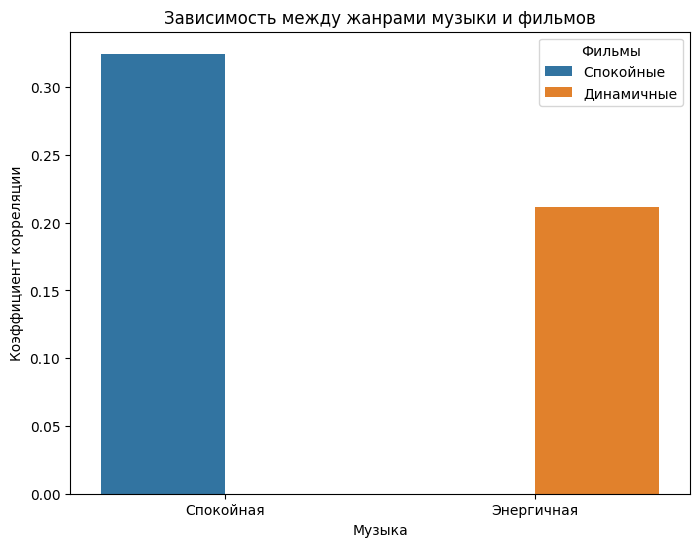

In [31]:
from scipy.stats import pearsonr, t

# Функция для расчета коэффициента корреляции Пирсона и проверки гипотезы
def correlation_analysis(data1, data2):
    correlation, pvalue = pearsonr(data1, data2)
    n = len(data1)
    df = n - 2
    t_critical = t.ppf(0.925, df)
    pvalue *= 2 # Двусторонний тест
    if abs(correlation) > t_critical and pvalue < 0.15:
        result = "Альтернативная гипотеза: коэффициент корреляции не равен нулю"
    else:
        result = "Нулевая гипотеза: коэффициент корреляции равен нулю"
    return correlation, pvalue, result

# Расчет коэффициента корреляции и проверка гипотезы для спокойных жанров музыки и фильмов
music_calm = music[['Classical music', 'Opera', 'Swing, Jazz', 'Reggae, Ska', 'Country', 'Musical', 'Folk']]
movies_calm = movies[['Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary']]

correlation_calm, pvalue_calm, result_calm = correlation_analysis(music_calm.mean(axis=1), movies_calm.mean(axis=1))

# Расчет коэффициента корреляции и проверка гипотезы для энергичных жанров музыки и фильмов
music_dynamic = music[['Dance', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance']]
movies_dynamic = movies[['Horror', 'Thriller', 'Comedy', 'Sci-fi', 'War', 'Western']]

correlation_dynamic, pvalue_dynamic, result_dynamic = correlation_analysis(music_dynamic.mean(axis=1), movies_dynamic.mean(axis=1))

# Вывод результатов
print("Спокойные жанры:")
print("Коэффициент корреляции:", correlation_calm)
print("p-значение:", pvalue_calm)
print(result_calm)
print()
print("Энергичные жанры:")
print("Коэффициент корреляции:", correlation_dynamic)
print("p-значение:", pvalue_dynamic)
print(result_dynamic)

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# Создание датафрейма для визуализации
visualization_data = pd.DataFrame({
    'Музыка': ['Спокойная'] * len(music_calm) + ['Энергичная'] * len(music_dynamic),
    'Фильмы': ['Спокойные'] * len(movies_calm) + ['Динамичные'] * len(movies_dynamic),
    'Значения корреляции': [correlation_calm] * len(music_calm) + [correlation_dynamic] * len(music_dynamic)
})

# Визуализация
plt.figure(figsize=(8, 6))
sns.barplot(x='Музыка', y='Значения корреляции', hue='Фильмы', data=visualization_data)
plt.title('Зависимость между жанрами музыки и фильмов')
plt.xlabel('Музыка')
plt.ylabel('Коэффициент корреляции')
plt.show()

Этот код выполняет следующие действия:

1. Импортирует функции pearsonr и t из модуля scipy.stats.
2. Определяет функцию correlation_analysis, которая принимает два набора данных (data1 и data2) и выполняет следующие операции:
   - Расчет коэффициента корреляции Пирсона (correlation) и p-значения (pvalue) между data1 и data2 с помощью функции pearsonr.
   - Вычисление степеней свободы (df) на основе размера выборки.
   - Вычисление критического значения t_critical с использованием функции t.ppf для двустороннего теста с уровнем значимости 0.05 (или 0.925 для доверительного уровня 0.05).
   - Умножение p-значения на 2 для двустороннего теста.
   - Проверку гипотезы: если абсолютное значение коэффициента корреляции больше критического значения t_critical и p-значение меньше 0.15, то альтернативная гипотеза о том, что коэффициент корреляции не равен нулю, принимается. В противном случае, принимается нулевая гипотеза о том, что коэффициент корреляции равен нулю.
   - Возвращает коэффициент корреляции, p-значение и результат проверки гипотезы.
3. Определяет две подвыборки данных из таблиц music и movies для спокойных (music_calm и movies_calm) и энергичных (music_dynamic и movies_dynamic) жанров.
4. Выполняет расчет коэффициента корреляции и проверку гипотезы для спокойных жанров музыки и фильмов с помощью функции correlation_analysis и средних значений по столбцам.
5. Выполняет расчет коэффициента корреляции и проверку гипотезы для энергичных жанров музыки и фильмов с помощью функции correlation_analysis и средних значений по столбцам.
6. Выводит и визуализирует данные.

Этот код выполняет анализ корреляции между средними значениями жанров музыки и фильмов, а также проверку гипотезы о ненулевой корреляции. Результаты выводятся для спокойных и энергичных жанров музыки и фильмов.





---





Коэффициент корреляции Спирмена, измеряет монотонную связь между двумя переменными, предполагая только монотонность связи и не требуя линейности или нормальности данных. Он менее чувствителен к выбросам и может обнаружить нелинейные связи между переменными.

<ipython-input-32-34608b455b3a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['calm_music_preference'] = music[calm_music_genres].mean(axis=1)
<ipython-input-32-34608b455b3a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music['energetic_music_preference'] = music[energetic_music_genres].mean(axis=1)
<ipython-input-32-34608b455b3a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Calm genres correlation: 0.29375338065632994
Energetic genres correlation: 0.1962232565980076


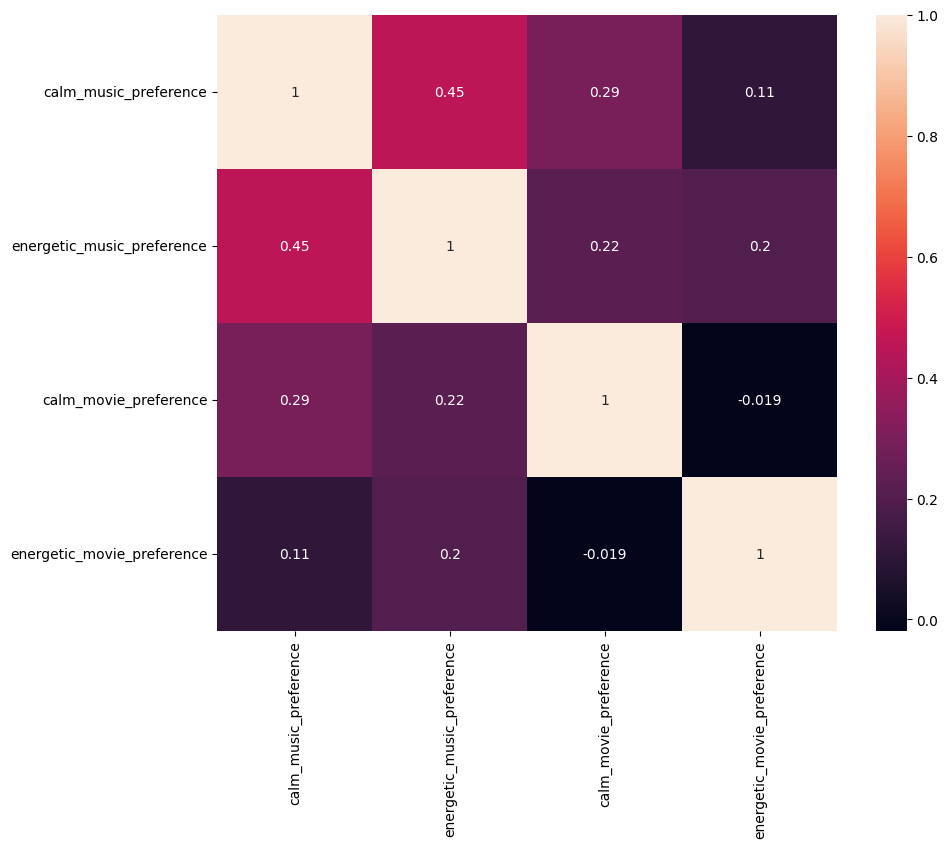

In [32]:
from scipy.stats import spearmanr

# Определение жанров музыки
calm_music_genres = ['Classical music', 'Opera', 'Swing, Jazz', 'Reggae, Ska', 'Country', 'Musical']
energetic_music_genres = ['Dance', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Folk', 'Hiphop, Rap', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance']

# Создание новых переменных
music['calm_music_preference'] = music[calm_music_genres].mean(axis=1)
music['energetic_music_preference'] = music[energetic_music_genres].mean(axis=1)

# Определение жанров фильмов
calm_movie_genres = ['Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary']
energetic_movie_genres = ['Horror', 'Thriller', 'Comedy', 'Sci-fi', 'War', 'Western']

# Создание новых переменных
movies['calm_movie_preference'] = movies[calm_movie_genres].mean(axis=1)
movies['energetic_movie_preference'] = movies[energetic_movie_genres].mean(axis=1)

# Объединение таблиц
df = pd.concat([music, movies], axis=1)

# Корреляционный анализ
calm_corr, _ = spearmanr(df['calm_music_preference'], df['calm_movie_preference'])
energetic_corr, _ = spearmanr(df['energetic_music_preference'], df['energetic_movie_preference'])

print(f'Calm genres correlation: {calm_corr}')
print(f'Energetic genres correlation: {energetic_corr}')

# Визуализация результатов
plt.figure(figsize=(10, 8))
sns.heatmap(df[['calm_music_preference', 'energetic_music_preference', 'calm_movie_preference', 'energetic_movie_preference']].corr(method='spearman'), annot=True)
plt.show()

Этот код выполняет следующие действия:

1. Импортирует функцию spearmanr из модуля scipy.stats для расчета корреляции Спирмена.
2. Определяет списки calm_music_genres и energetic_music_genres, содержащие названия жанров музыки, которые относятся к спокойным и энергичным жанрам соответственно.
3. Создает новые переменные в таблице music:
   - calm_music_preference - среднее значение по спокойным жанрам музыки.
   - energetic_music_preference - среднее значение по энергичным жанрам музыки.
4. Определяет списки calm_movie_genres и energetic_movie_genres, содержащие названия жанров фильмов, которые относятся к спокойным и энергичным жанрам соответственно.
5. Создает новые переменные в таблице movies:
   - calm_movie_preference - среднее значение по спокойным жанрам фильмов.
   - energetic_movie_preference - среднее значение по энергичным жанрам фильмов.
6. Объединяет таблицы music и movies по столбцам с помощью функции pd.concat() и сохраняет результат в переменной df.
7. Выполняет корреляционный анализ между спокойными и энергичными предпочтениями по музыке и фильмам с помощью функции spearmanr.
8. Выводит результаты корреляционного анализа для спокойных и энергичных жанров. Выполняет визуализицию.

Этот код выполняет анализ корреляции между спокойными и энергичными предпочтениями по музыке и фильмам. Результаты выводятся для каждой группы жанров.




---



Сделаем вычисления на данных, полученных с нашего опроса.
В таблице есть колонки жанры фильмов - Horror, Thriller,Comedy,Sci-fi,War, Western, Romantic, Fantasy/Fairy tales, Animated, Documentary. Другие колонки со средними значениями в предпочтении в музыке Slow и Fast. Значения в ячейках целые числа от 1 до 5 (где 1 - не нравится, 5-очень нравится) в соответствии с предпочтениями конкретного человека.

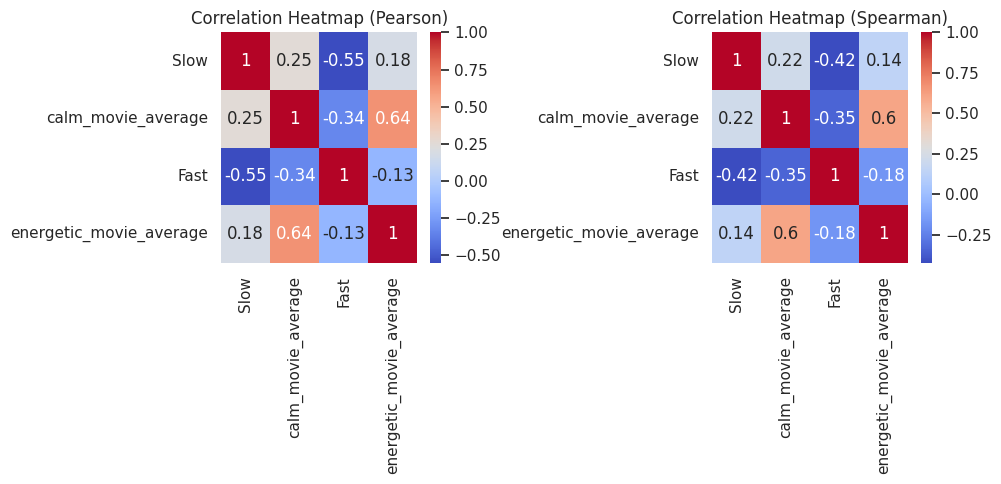

In [38]:
# Загрузка данных из таблицы
survey_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/Survey.csv', sep = ";")

# Определение списков спокойных и энергичных жанров фильмов
calm_movie_genres = ['Romantic', 'Fantasy/Fairy tales', 'Animated', 'Documentary']
energetic_movie_genres = ['Horror', 'Thriller', 'Comedy', 'Western', 'War', 'Sci-fi']

# Вычисление средних оценок для каждой категории
survey_data['calm_movie_average'] = survey_data[calm_movie_genres].mean(axis=1)
survey_data['energetic_movie_average'] = survey_data[energetic_movie_genres].mean(axis=1)

# Вычисление матрицы корреляции Пирсона
pearson_corr = survey_data[['Slow', 'calm_movie_average', 'Fast', 'energetic_movie_average']].corr()

# Вычисление матрицы корреляции Спирмена
spearman_corr = survey_data[['Slow', 'calm_movie_average', 'Fast', 'energetic_movie_average']].corr(method='spearman')

# Визуализация данных с использованием тепловых карт
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Pearson)")

plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Spearman)")

plt.tight_layout()
plt.show()


Код выполняет следующие действия:

1. Загрузка данных из таблицы Survey.csv с помощью функции read_csv(). Разделитель в данном случае задан как ; с помощью аргумента sep=";".
2. Определение списков calm_movie_genres и energetic_movie_genres, содержащих названия спокойных и энергичных жанров фильмов соответственно.
3. Вычисление средних оценок для каждой категории жанров фильмов. Создаются два новых столбца в survey_data: calm_movie_average, в котором содержатся средние оценки для спокойных жанров, и energetic_movie_average, в котором содержатся средние оценки для энергичных жанров. Для этого используется метод mean() с аргументом axis=1, который вычисляет среднее значение по строкам.
4. Вычисление матрицы корреляции Пирсона между переменными Slow, calm_movie_average, Fast и energetic_movie_average с помощью метода corr(). Результат сохраняется в переменной pearson_corr.
5. Вычисление матрицы ранговой корреляции Спирмена между теми же переменными с помощью метода corr() и аргумента method='spearman'. Результат сохраняется в переменной spearman_corr.
6. Визуализация данных с помощью тепловых карт с использованием библиотеки seaborn и matplotlib.pyplot.
   - Создается фигура с размером 10x5 с помощью plt.figure(figsize=(10, 5)).
   - Создаются две ячейки с помощью plt.subplot(1, 2, 1) и plt.subplot(1, 2, 2). Это означает, что будет создана сетка 1x2 (1 строка, 2 столбца), и текущая ячейка будет первой или второй.
   - Для каждой ячейки вызывается метод sns.heatmap(), который создает тепловую карту на основе переданной матрицы корреляции.
   - Аргумент annot=True добавляет числовые значения внутри ячеек тепловой карты.
   - Аргумент cmap='coolwarm' определяет цветовую схему для тепловой карты.
   - Заголовки для каждой тепловой карты устанавливаются с помощью plt.title().
   - Наконец, вызывается plt.tight_layout(), чтобы автоматически настроить компоновку подзаголовков и осей.
   - Используется plt.show(), чтобы отобразить фигуру с тепловыми картами.

Данный датасет, состоящий из всего 32 записей, можно считать недостаточно репрезентативным для полного исследования и обобщения результатов.
 Однако, результаты корреляционного анализа показали низкий коэффициент корреляции, что свидетельствует о слабой связи между этими двумя переменными. Это говорит о том, что предпочтения в музыке не являются определяющим фактором в выборе жанров фильмов в данной выборке.


*Результаты*


В ходе нашего исследования мы рассматривали гипотезу о связи между предпочтениями в музыке и кино. Было предположено, что люди, предпочитающие более энергичную музыку, склонны к выбору более динамичных жанров фильмов, в то время как люди, предпочитающие более спокойную музыку, склонны к выбору более спокойных жанров фильмов.

Для проверки этой гипотезы мы использовали коэффициент корреляции Пирсона и ранговую корреляцию Спирмена. На наш взгляд ранговая корреляция Спирмена больше подходит для измерения взаимосвязи между наборами данных, потому что не требует нормальности данных.

Однако, полученные результаты показали слабую связь между предпочтениями в музыке и кино. Коэффициенты корреляции для спокойной и энергичной музыки и фильмов были достаточно низкими, что указывает на отсутствие сильной линейной связи между этими переменными.

Исходя из этого, мы приходим к выводу, что наша первоначальная гипотеза не подтвердилась. Это означает, что на основании наших данных мы не можем утверждать, что музыкальные предпочтения существенно влияют на кинематографические предпочтения.

Возможно, в предпочтениях людей в музыке и кино играют роль и другие факторы, которые не были учтены в рамках данного исследования. Это могут быть образование, культурный бэкграунд и другие. Для более глубокого исследования этой темы потребуется больше данных и более сложные аналитические методы.